<a href="https://colab.research.google.com/github/nrubio6131/nico_CIS/blob/master/trabajos_CIS/Clase3_regresion_polinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score

In [2]:
# import gspread
# from oauth2client.client import GoogleCredentials 
# from google.colab import auth
# auth.authenticate_user()
# gc = gspread.authorize (GoogleCredentials.get_application_default())

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#importamos los datos
#data1 = pd.read_csv('/content/drive/My Drive/CIS/DATASET/datos_polinomio.csv',delimiter=',')#desde google drive
data1 = pd.read_csv('../../data/datos_polinomio.csv',delimiter=',')#desde una carpeta en el repositorio
data1

,X,Y1,x2,Y2,X3,Y3,Y1_ruido,Y2_ruido,Y3_ruido
0,-1.00,5.000,-4.00,-14.0000,-1.00,8.000000,3.600,-12.5700,7.420000
1,-0.98,4.604,-3.96,-13.8584,-0.97,7.299665,4.144,-12.8784,8.699665
2,-0.96,4.216,-3.92,-13.7136,-0.94,6.638120,5.046,-14.4836,5.268120
3,-0.94,3.836,-3.88,-13.5656,-0.91,6.014555,4.346,-12.9856,4.384555
4,-0.92,3.464,-3.84,-13.4144,-0.88,5.428160,1.994,-14.4544,6.458160
...,...,...,...,...,...,...,...,...,...
95,0.90,3.100,-0.20,13.7400,1.85,2.549375,1.340,11.8200,2.479375
96,0.92,3.464,-0.16,14.1856,1.88,1.917440,4.544,15.7556,2.657440
97,0.94,3.836,-0.12,14.6344,1.91,1.247345,4.176,13.9944,3.107345
98,0.96,4.216,-0.08,15.0864,1.94,0.538280,2.616,14.4064,-0.661720


In [3]:
#Organizamos los datos
X1 = data1.iloc[:,4]
X1= X1[:, np.newaxis]
Y1= data1.iloc[:,5]
Y1 = Y1[:, np.newaxis]
print("dimension en X {}" .format(X1.shape))
print("dimension en Y {}" .format(Y1.shape))

dimension en X (100, 1)
dimension en Y (100, 1)


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=.3, random_state=3)

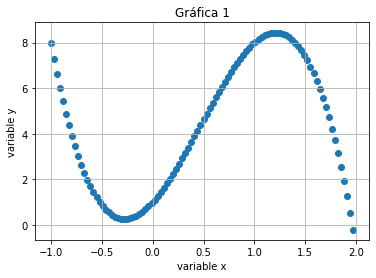

In [5]:
#graficamos
plt.scatter(X1,Y1)
plt.title("Gráfica 1")
plt.xlabel("variable x")
plt.ylabel("variable y")
plt.grid()
plt.show()

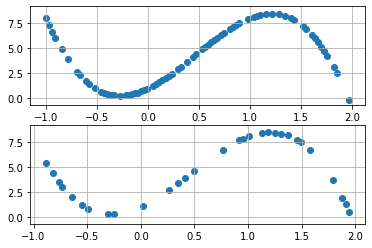

In [6]:
f, [ax1, ax2] = plt.subplots(2, 1, sharey=True) 
ax1.scatter(X_train,Y_train)
ax2.scatter(X_test, Y_test)
ax1.grid()
ax2.grid()
plt.show()

In [11]:
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
X_poli = pf.fit_transform(X_train.reshape(-1,1))  # transformamos la entrada en polinómica
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_poli, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

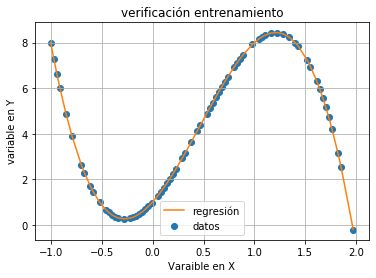

In [12]:
#Organizacion de datos con pandas    SORT
datos_organizados_2=pd.DataFrame([X_train[:,0],regresion_lineal.predict(X_poli)[:,0]]).transpose()
datos_organizados_2.columns=['x_organizado_2','y_organizado_2']
datos_organizados_2=datos_organizados_2.sort_values('x_organizado_2')
X1_organizado = datos_organizados_2.iloc[:,0]
X1_organizado= X1_organizado[:, np.newaxis]
Y1_organizado = datos_organizados_2.iloc[:,1]
Y1_organizado= Y1_organizado[:, np.newaxis]

#Graficamos los datos ya organizados
plt.scatter(X_train, Y_train,label='datos')
plt.plot(X1_organizado, Y1_organizado, color=  '#ff7f0e',label='regresión')#probar con plot
plt.title("verificación entrenamiento")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.legend()
plt.grid()
plt.show()

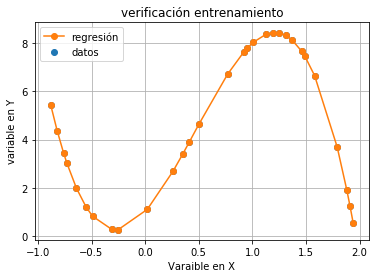

In [11]:
X_test_poli=pf.fit_transform(X_test.reshape(-1,1))  # transformamos la entrada en polinómica

datos_organizados_test=pd.DataFrame([X_test[:,0],regresion_lineal.predict(X_test_poli)[:,0]]).transpose()
datos_organizados_test.columns=['x_organizado_2','y_organizado_2']
datos_organizados_test=datos_organizados_test.sort_values('x_organizado_2')
X1_organizado_2 = datos_organizados_test.iloc[:,0]
X1_organizado_2= X1_organizado_2[:, np.newaxis]
Y1_organizado_2 = datos_organizados_test.iloc[:,1]
Y1_organizado_2= Y1_organizado_2[:, np.newaxis]

#Graficamos los datos ya organizados
plt.scatter(X_test, Y_test,label='datos')
plt.plot(X1_organizado_2, Y1_organizado_2, color=  '#ff7f0e',label='regresión', marker='o')#probar con plot
plt.title("verificación entrenamiento")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.legend()
plt.grid()
plt.show()

In [12]:
print(r2_score(Y_train,regresion_lineal.predict(X_poli)))

print(r2_score(Y_test,regresion_lineal.predict(X_test_poli)))

1.0
1.0


 Muchachos apra obtener los parametros de la regresion polinomica se realiza por medio de los metodos .coef_ y .intercept siendo coef_, los valores de a1,a2,a3.... e intercept el valor de B!
<br><br>
La forma de una ecuacion lineal es
$Y = AX_1+B$

La forma de una ecuacion polinomica es
$Y = A_1X_1 + A_2X_1^2 + A_3X_1^3 + A_4X_1^4 ... +B$


In [13]:
regresion_lineal.coef_
regresion_lineal.intercept_
print('valores para A = {}'.format(regresion_lineal.coef_[0,:]))#valores de A
print('valores para B = {}'.format(regresion_lineal.intercept_))#valor de B

valores para A = [ 0.  5.  7. -5.]
valores para B = [1.]


# Ejericcios opcionales
   * Recrear los modelos de regresión lineal y polinomica utilizando el data set dado
   * Realizar un dataset y lelgar a la misma función de entrada
   * Utilizando las el vector de coef_ y intercept_ realizar una función que imprima los valores en la forma de la función, la respeusta deseada se encuentra abajo

In [14]:
n=0;
i=0;
print('La función resultante es:',end=' ')
for i in range(regresion_lineal.coef_.shape[1]-1):
    if i == 0:
        if round(float(regresion_lineal.coef_[:,i+1]),4) % 1 == 0:
            if round(float(regresion_lineal.coef_[:,i+1])) != 0:
                print('{0}*x'.format(round(float(regresion_lineal.coef_[:,i+1]))),end=' ')
        else:   
            print('{0:1.4f}*x'.format(float(regresion_lineal.coef_[:,i+1])),end=' ')
    else:
        if round(float(regresion_lineal.coef_[:,i+1]),4) % 1 == 0:
            if round(float(regresion_lineal.coef_[:,i+1])) > 0:
                print('+ {1}*x^{0}'.format(i+1,round(float(regresion_lineal.coef_[:,i+1]))),end=' ')
            elif round(float(regresion_lineal.coef_[:,i+1])) < 0:
                print('- {1}*x^{0}'.format(i+1,abs(round(float(regresion_lineal.coef_[:,i+1])))),end=' ')
        else: 
            if round(float(regresion_lineal.coef_[:,i+1])) > 0:
                print('+ {1:1.4f}*x^{0}'.format(i+1,float(regresion_lineal.coef_[:,i+1])),end=' ')
            elif round(float(regresion_lineal.coef_[:,i+1])) < 0:
                print('- {1:1.4f}*x^{0}'.format(i+1,abs(float(regresion_lineal.coef_[:,i+1]))),end=' ')


if regresion_lineal.intercept_ >=0:
    print('+',end=' ')
if round(float(regresion_lineal.intercept_),4) % 1 == 0:   
    print('{0}'.format(round(float(regresion_lineal.intercept_))))
else:
    print('{0:.2f}'.format(float(regresion_lineal.intercept_))) 

La función resultante es: 5*x + 7*x^2 - 5*x^3 + 1
